In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Read the data
train_df = pd.read_csv('Resources/train.csv')
test_df = pd.read_csv('Resources/test.csv')

In [2]:
# pd.set_option(‘display.height’, 100)
pd.set_option('display.max_rows', 85)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 100)

In [3]:
# Create Total Living Area SF and Price Per SF for lot and Living Area 
basement1 = train_df['BsmtFinSF1']
basement2 = train_df['BsmtFinSF2']
living_space = train_df['GrLivArea']
lot = train_df['LotArea']
sale_price = train_df['SalePrice']

total_square_feet = living_space + basement1 + basement2
total_square_feet_lot = lot 
cost_per_square_feet = sale_price / total_square_feet
cost_per_square_feet_lot = sale_price / total_square_feet_lot


train_df['Total Square Feet (ft)'] = total_square_feet
train_df['Total Lot Square Feet (ft)'] = total_square_feet_lot
train_df['Total Cost Per Square Feet ($)'] = cost_per_square_feet.round(2)
train_df['Total Lot Cost Per Square Feet ($)'] = cost_per_square_feet_lot

In [4]:
Test_basement1 = test_df['BsmtFinSF1']
Test_basement2 = test_df['BsmtFinSF2']
Test_living_space = test_df['GrLivArea']
Test_lot = test_df['LotArea']


Test_total_square_feet = Test_living_space + Test_basement1 + Test_basement2
test_df['Total Square Feet (ft)'] = total_square_feet

In [5]:
from sklearn.preprocessing import OneHotEncoder
import sklearn
import tensorflow
tensorflow.keras.__version__
from tensorflow.keras.utils import to_categorical 

/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [6]:
#Train Encoding, created multiple additional columns
train_df_hot = pd.DataFrame(train_df, columns=['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']      
        )

train_df_hot = pd.get_dummies(train_df_hot,drop_first=True)

#Test DF Hot Encoding 
test_df_hot = pd.DataFrame(test_df, columns=['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']      
        )

test_df_hot = pd.get_dummies(test_df_hot,drop_first=True)

test_df_hot.head()


,Alley_Pave,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Fence_GdWo,Fence_MnPrv,Fence_MnWw,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MiscFeature_Othr,MiscFeature_Shed,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_P,PavedDrive_Y,PoolQC_Gd,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave
0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0

In [7]:
train_df = pd.concat([train_df, train_df_hot], axis=1)
train_df = train_df.drop(columns=['Id','Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities'] )


test_df = pd.concat([test_df, test_df_hot], axis=1)
test_df = test_df.drop(columns=['Id','Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities'] )

#Set Everything to Numeric
train_df = train_df.apply(pd.to_numeric)
test_df = test_df.apply(pd.to_numeric)

train_df = train_df.fillna(0)
test_df = test_df.fillna(0)


In [8]:
train_df.describe

<bound method NDFrame.describe of       MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0             60         65.0     8450            7            5       2003          2003   
1             20         80.0     9600            6            8       1976          1976   
2             60         68.0    11250            7            5       2001          2002   
3             70         60.0     9550            7            5       1915          1970   
4             60         84.0    14260            8            5       2000          2000   
...          ...          ...      ...          ...          ...        ...           ...   
1455          60         62.0     7917            6            5       1999          2000   
1456          20         85.0    13175            6            6       1978          1988   
1457          70         66.0     9042            7            9       1941          2006   
1458          20         68.0     97

# KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
#General Living Area
y = train_df["GrLivArea"]
target_names = ["negative", "positive"]

In [11]:
X = train_df.drop("GrLivArea", axis=1)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 1.000/0.022
k: 3, Train/Test Score: 0.324/0.027
k: 5, Train/Test Score: 0.198/0.022
k: 7, Train/Test Score: 0.156/0.016
k: 9, Train/Test Score: 0.126/0.016
k: 11, Train/Test Score: 0.107/0.022
k: 13, Train/Test Score: 0.096/0.025
k: 15, Train/Test Score: 0.092/0.025
k: 17, Train/Test Score: 0.087/0.030
k: 19, Train/Test Score: 0.076/0.033
k: 21, Train/Test Score: 0.074/0.027
k: 23, Train/Test Score: 0.074/0.027
k: 25, Train/Test Score: 0.076/0.030
k: 27, Train/Test Score: 0.071/0.030
k: 29, Train/Test Score: 0.069/0.030


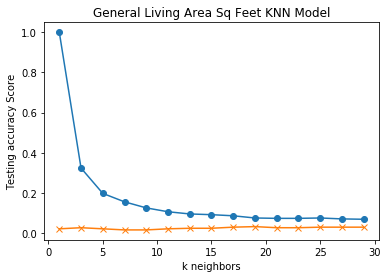

<Figure size 432x288 with 0 Axes>

In [13]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.title("General Living Area Sq Feet KNN Model")
plt.show()
plt.savefig('templates/images/KNN_Living_Area.png')

In [14]:
#Total Basement Sq Feet
y = train_df["TotalBsmtSF"]
target_names = ["negative", "positive"]

In [15]:
X = train_df.drop("TotalBsmtSF", axis=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 1.000/0.036
k: 3, Train/Test Score: 0.332/0.014
k: 5, Train/Test Score: 0.210/0.025
k: 7, Train/Test Score: 0.159/0.036
k: 9, Train/Test Score: 0.132/0.044
k: 11, Train/Test Score: 0.124/0.047
k: 13, Train/Test Score: 0.120/0.036
k: 15, Train/Test Score: 0.115/0.033
k: 17, Train/Test Score: 0.109/0.030
k: 19, Train/Test Score: 0.104/0.036
k: 21, Train/Test Score: 0.095/0.033
k: 23, Train/Test Score: 0.089/0.036
k: 25, Train/Test Score: 0.088/0.036
k: 27, Train/Test Score: 0.086/0.038
k: 29, Train/Test Score: 0.082/0.044


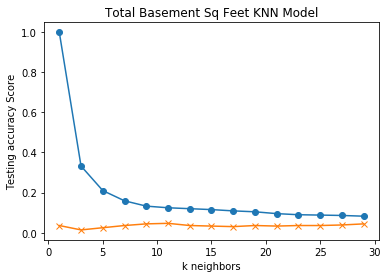

In [17]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.title("Total Basement Sq Feet KNN Model")
plt.savefig('templates/images/KNN_Total_Basement.png')
plt.show()

In [18]:
#Overall quality
y = train_df["OverallQual"]
target_names = ["negative", "positive"]

In [19]:
X = train_df.drop("OverallQual", axis=1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 1.000/0.419
k: 3, Train/Test Score: 0.691/0.455
k: 5, Train/Test Score: 0.621/0.510
k: 7, Train/Test Score: 0.603/0.523
k: 9, Train/Test Score: 0.600/0.534
k: 11, Train/Test Score: 0.592/0.526
k: 13, Train/Test Score: 0.568/0.510
k: 15, Train/Test Score: 0.560/0.493
k: 17, Train/Test Score: 0.548/0.523
k: 19, Train/Test Score: 0.547/0.515
k: 21, Train/Test Score: 0.549/0.515
k: 23, Train/Test Score: 0.538/0.532
k: 25, Train/Test Score: 0.529/0.548
k: 27, Train/Test Score: 0.528/0.548
k: 29, Train/Test Score: 0.533/0.553


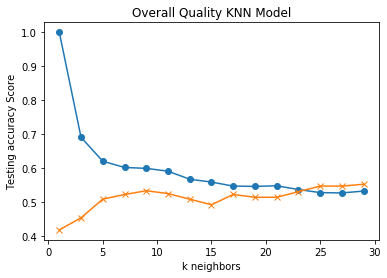

In [21]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.title("Overall Quality KNN Model")
plt.savefig('templates/images/KNN_Overal_Quality.png')
plt.show()

In [22]:
#Lot Area
y = train_df["LotArea"]
target_names = ["negative", "positive"]

In [23]:
X = train_df.drop("LotArea", axis=1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 1.000/0.022
k: 3, Train/Test Score: 0.277/0.016
k: 5, Train/Test Score: 0.142/0.008
k: 7, Train/Test Score: 0.100/0.008
k: 9, Train/Test Score: 0.090/0.005
k: 11, Train/Test Score: 0.080/0.011
k: 13, Train/Test Score: 0.072/0.011
k: 15, Train/Test Score: 0.069/0.014
k: 17, Train/Test Score: 0.069/0.011
k: 19, Train/Test Score: 0.068/0.008
k: 21, Train/Test Score: 0.066/0.008
k: 23, Train/Test Score: 0.059/0.008
k: 25, Train/Test Score: 0.061/0.011
k: 27, Train/Test Score: 0.059/0.011
k: 29, Train/Test Score: 0.062/0.011


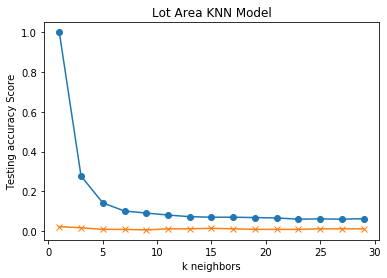

In [25]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.title("Lot Area KNN Model")
plt.savefig('templates/images/KNN_Lot_Area.png')
plt.show()